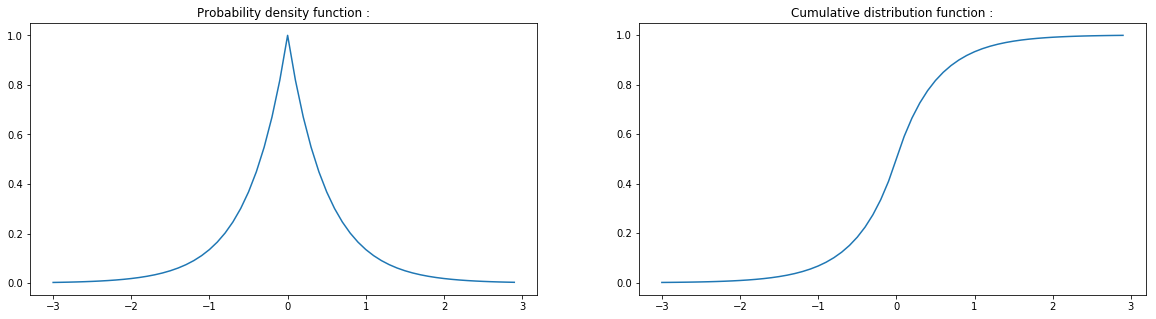

In [5]:
#1.1 Завдання 1

import numpy as np
from scipy.stats import rv_continuous

class my_rv(rv_continuous):
    def _pdf(self, x):
        return np.exp(-2*abs(x)) 
rv = my_rv()

#1.2 Завдання 2

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

x = np.arange(-3, 3, 0.1)

plt.subplot(1, 2, 1)
plt.plot(x, rv.pdf(x))
plt.title("Probability density function :")

plt.subplot(1, 2, 2)
plt.plot(x, rv.cdf(x))
plt.title("Cumulative distribution function :")

plt.show()

In [10]:
#1.3 Завдання 3

import scipy.integrate as integrate
import scipy.special as special

n = 1000

def task1_t():
    return rv.cdf(1)

def task1_e():
    rvs = rv.rvs(size=n)
    return len(list(filter(lambda x: x < 1, rvs))) / n

def task2_t():
    return (rv.cdf(3) - rv.cdf(2)) / (1 - rv.cdf(2))

def task2_e():
    rvs = rv.rvs(size=n)
    numerator = len(list(filter(lambda x: 2 <= x < 3, rvs))) / n
    denominator = len(list(filter(lambda x: x >= 2, rvs))) / n
    return numerator / denominator

def task3_t():
    E = integrate.quad(lambda x: x * np.exp(-2*abs(x)), -float('inf'), float('inf'))[0]
    D = integrate.quad(lambda x: x ** 2 * np.exp(-2*abs(x)), -float('inf'), float('inf'))[0] - E ** 2;
    return E, D

def task3_e():
    E, D = rv.stats()
    return E, D

t = task3_t();
e = task3_e();
print("E(ksi):\nTheoretically: {}\nIn-built functions: {}\n".format(t[0], e[0]))
print("D(ksi):\nTheoretically: {}\nIn-built functions: {}\n".format(t[1], e[1]))


E(ksi):
Theoretically: 0.0
In-built functions: -6.43552716349e-09

D(ksi):
Theoretically: 0.5
In-built functions: 0.500001340084



/ext/sage/sage-8.7_1804/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1618: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


10/3
50/17


1000/339


2000/653


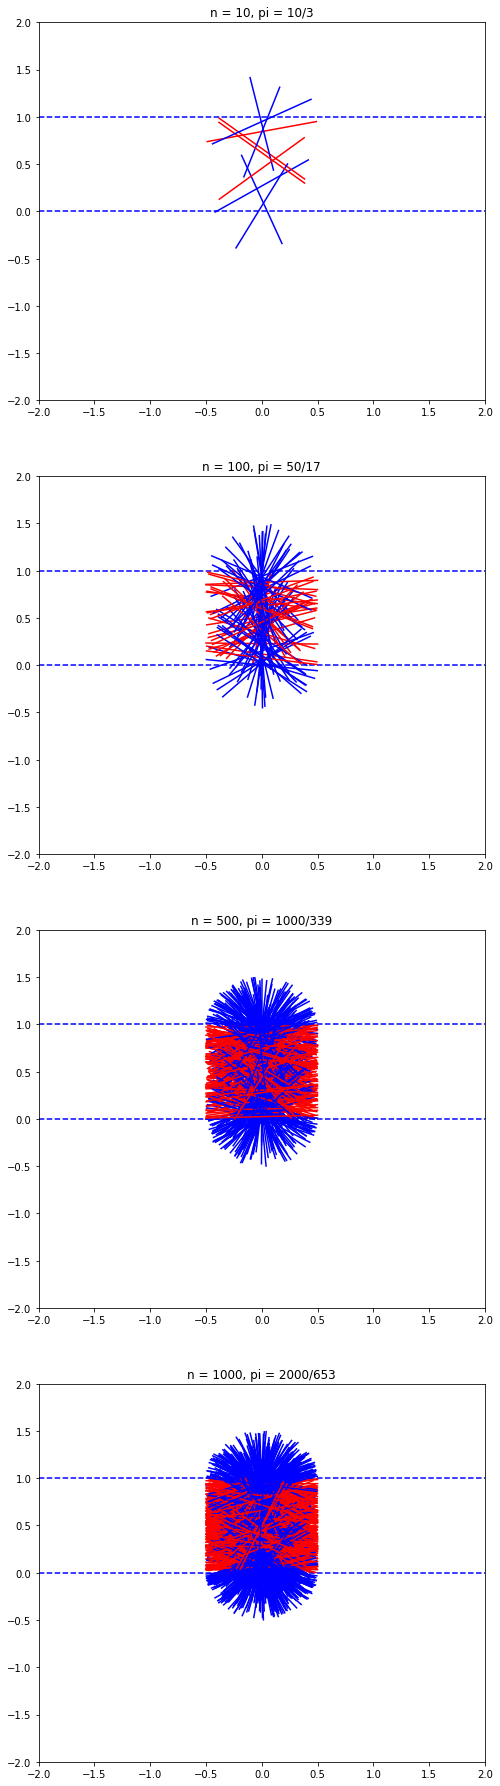

In [9]:
#2 Апроксимація числа pi (задача Бюффона)

from scipy.stats import uniform

fig, ax = plt.subplots(4, 1, figsize=(8, 32))

def e_prob(n, i):
    pi = 0
    y = uniform.rvs(0, 1, size=n)
    phi = uniform.rvs(0, np.pi, size=n)
    points = zip(y, phi)
    
    ax[i].plot([-5, 5], [1, 1], 'b--')
    ax[i].plot([-5, 5], [0, 0], 'b--')
    
    for p in points:
        x1, y1 = np.cos(p[1]) * 0.5, np.sin(p[1]) * 0.5 + p[0]
        x2, y2 =-np.cos(p[1]) * 0.5,-np.sin(p[1]) * 0.5 + p[0]
        
        if y1 >= 1 or y2 <= 0:
            pi += 1 
            ax[i].plot([x1, x2], [y1, y2], color='b')
        else:
            ax[i].plot([x1, x2], [y1, y2], color='r')
            
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    
    ax[i].set_title("n = {}, pi = {}".format(n, 2 * (pi / n) ** (-1)))
        
    return 2 * (pi / n) ** (-1)
    

a = 1
n = [10, 100, 500, 1000]
i = 0
for n in n:
    ep = e_prob(n, i)
    print(ep)
    i += 1